**NBA Rookies Assignment**  -  **Group - 015**

---
*   JERIN JOSE J
*   SUBHASH CHANDRABOSS V
*   KANDASAMY S

# Question
Data Visualization and Exploration Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them. Print the description and Basic statistical details. Print each class label count  and create charts for each class (% of data distribution). Write your observation on data balancing. Discuss need and process followed for balanced class in dataset. Perform data exploration and discuss insights drawn from them. Data Pre-processing and cleaning Do the appropriate preprocessing steps Identify NULL or Missing Values based on column. Apply appropriate feature engineering techniques for them. Use normalization for feature transformation and justify the method selected. Do the correlational analysis on the dataset. Provide a visualization for the same. Data Preparation Do the final feature selection and extract them into Column X and the class label into Column into Y. Split the dataset into training and test sets. Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ; Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% ; Case 2 : Train = 50 % Test = 50% [ x_train3,y_train3] = 50% ; [ x_test3,y_test3] = 50% ; Part B (12 marks) Model Building Perform Model Development using Logistic Regression using gradient descent and MLE(maximum likelihood estimation). Compare and discuss results for both methods. Justify use of L1 or L2 loss functions for GD. Explore different GD methods if required.

Train the model and print the training accuracy, Recall, F1 Score for case 1, case2 separately.

Performance Evaluation Clarity of the problem statement and explanation/justification of each step. Do the prediction for the test data and display the results for the inference. Print test Accuracy, Recall, F1 Score for case 1, case 2 and case 3 separately. Print the confusion matrix for all cases. Compare the accuracy of train data with test data. Provide appropriate analysis for the same for all cases. Write your observation for result of each question and justify your answer.

# Imports


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from collections import defaultdict

# Required Packages
import pandas as pd
import numpy as np

# Required for Visualization
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Readin Datasets
df = pd.read_csv("./nba_logreg.csv")

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1331 non-null   float64
 2   MIN          1336 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1336 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1337 non-null   float64
 17  STL          1337 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [ ]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,NaN,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74.0,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58.0,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48.0,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


### Handle Missing Data

In [ ]:
#check the null values using sum
df.isnull().sum()

Name            0
GP              9
MIN             4
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%            12
OREB            4
DREB            0
REB             0
AST             3
STL             3
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [ ]:
dataset = df.dropna()
dataset.shape

(1297, 21)

In [ ]:

dataset.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [ ]:
dataset.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74.0,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58.0,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48.0,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
6,Don MacLean,62.0,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1


In [ ]:
dataset.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590970,0.538972,0.542784,0.518059,0.294388,0.108325,0.099209,0.036932,0.484207,0.482931,0.191500,0.405936,0.472408,0.465627,0.368689,0.448942,0.283253,0.518114,0.394017
MIN,0.590970,1.000000,0.912721,0.904226,0.912177,0.209741,0.390325,0.403104,0.170485,0.791526,0.780960,0.238351,0.578424,0.749985,0.714272,0.630166,0.758262,0.403938,0.826785,0.311502
PTS,0.538972,0.912721,1.000000,0.990921,0.980259,0.262539,0.345629,0.354920,0.155383,0.897326,0.882721,0.255008,0.581705,0.700529,0.683368,0.553163,0.677942,0.392960,0.852338,0.309670
FGM,0.542784,0.904226,0.990921,1.000000,0.980163,0.299184,0.288229,0.297392,0.122906,0.849884,0.843423,0.218864,0.604227,0.710917,0.698755,0.531768,0.663989,0.404632,0.835859,0.311112
FGA,0.518059,0.912177,0.980259,0.980163,1.000000,0.138233,0.390249,0.412581,0.201977,0.829378,0.809735,0.264691,0.512961,0.649702,0.623610,0.590897,0.691971,0.330643,0.848613,0.285766
FG%,0.294388,0.209741,0.262539,0.299184,0.138233,1.000000,-0.292170,-0.348367,-0.334895,0.252499,0.305373,-0.154656,0.512814,0.410043,0.465630,-0.108755,0.061649,0.387598,0.126239,0.232246
3P Made,0.108325,0.390325,0.345629,0.288229,0.390249,-0.292170,1.000000,0.982761,0.596876,0.155103,0.092622,0.314540,-0.218135,0.018039,-0.071310,0.382115,0.311088,-0.156968,0.259870,0.033730
3PA,0.099209,0.403104,0.354920,0.297392,0.412581,-0.348367,0.982761,1.000000,0.589496,0.169747,0.105382,0.322383,-0.230394,0.013096,-0.079264,0.415569,0.343368,-0.169354,0.285166,0.014484
3P%,0.036932,0.170485,0.155383,0.122906,0.201977,-0.334895,0.596876,0.589496,1.000000,0.034666,-0.027295,0.321478,-0.289221,-0.121106,-0.190166,0.266762,0.196808,-0.242626,0.112142,-0.005617
FTM,0.484207,0.791526,0.897326,0.849884,0.829378,0.252499,0.155103,0.169747,0.034666,1.000000,0.980903,0.256494,0.588601,0.657700,0.657873,0.479566,0.605235,0.412188,0.808194,0.292859


In [ ]:
dataset.corr()["TARGET_5Yrs"].abs().sort_values(ascending=False)

TARGET_5Yrs    1.000000
GP             0.394017
MIN            0.311502
FGM            0.311112
PTS            0.309670
REB            0.299425
OREB           0.293788
FTA            0.293368
FTM            0.292859
FGA            0.285766
DREB           0.284712
TOV            0.266985
FG%            0.232246
STL            0.218859
BLK            0.210542
AST            0.167683
FT%            0.094636
3P Made        0.033730
3PA            0.014484
3P%            0.005617
Name: TARGET_5Yrs, dtype: float64

### Correlation Test

we can say most of the attributes are correlating. But FT%, 3P Made, 3PA, 3p% are weekly coorelated with the target feature

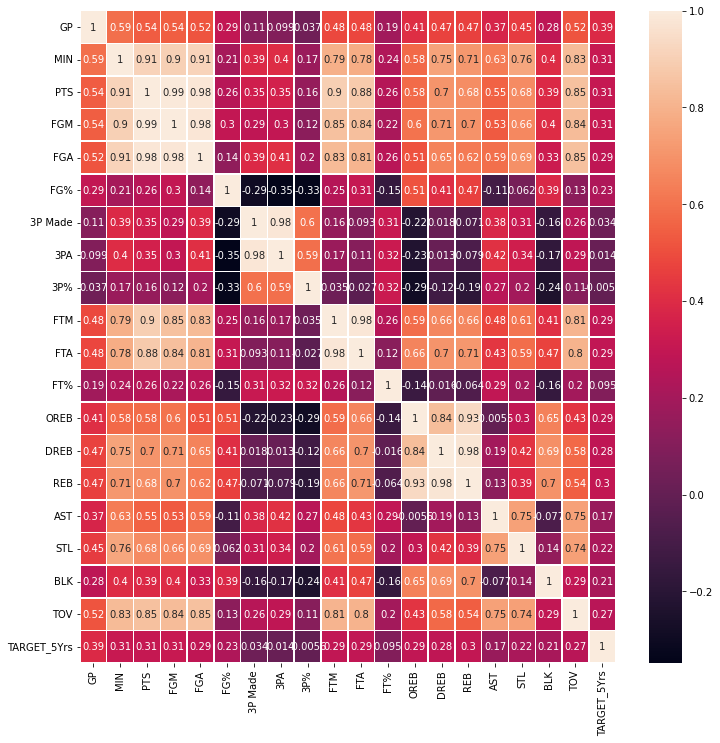

In [ ]:
corr=dataset.corr()

fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr, annot = True, linewidths = .5, ax = ax)
plt.show()

In [ ]:
def generate_correlated_columns(data):
    correlation_matrix = data.corr()
    correlated_features = set()
    correl_pair = defaultdict(lambda: [])

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
                correlated_features.add(correlation_matrix.columns[j])
                correl_pair[correlation_matrix.columns[i]].append(
                    correlation_matrix.columns[j])
                correl_pair[correlation_matrix.columns[j]].append(
                    correlation_matrix.columns[i])
    return correl_pair

In [ ]:
generate_correlated_columns(dataset)

defaultdict(<function __main__.generate_correlated_columns.<locals>.<lambda>>,
            {'3P Made': ['3PA'],
             '3PA': ['3P Made'],
             'DREB': ['OREB', 'REB'],
             'FGA': ['MIN', 'PTS', 'FGM', 'FTM', 'FTA', 'TOV'],
             'FGM': ['MIN', 'PTS', 'FGA', 'FTM', 'FTA', 'TOV'],
             'FTA': ['PTS', 'FGM', 'FGA', 'FTM', 'TOV'],
             'FTM': ['PTS', 'FGM', 'FGA', 'FTA', 'TOV'],
             'MIN': ['PTS', 'FGM', 'FGA', 'TOV'],
             'OREB': ['DREB', 'REB'],
             'PTS': ['MIN', 'FGM', 'FGA', 'FTM', 'FTA', 'TOV'],
             'REB': ['OREB', 'DREB'],
             'TOV': ['MIN', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA']})

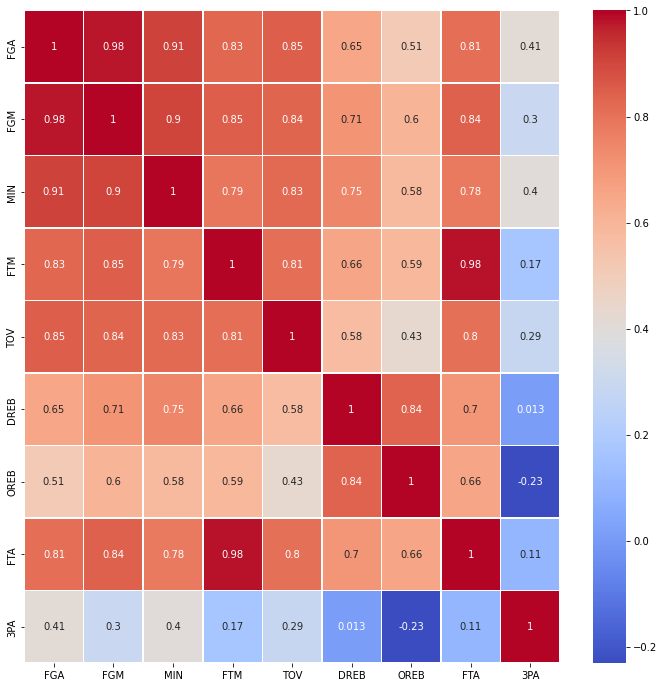

In [ ]:
higly_correlated = ['FGA', 'FGM','MIN','FTM','TOV', 'DREB', 'OREB', 'FTA', '3PA',]
corr=dataset[higly_correlated].corr()

fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr, annot = True, linewidths = .5, ax = ax, cmap = 'coolwarm')
plt.show()

From the above results we can see there are many columns which are interrelated, using all these variables might endup in multicollinerity
After Manually checking through the correlation heatmap, the following columns are selected

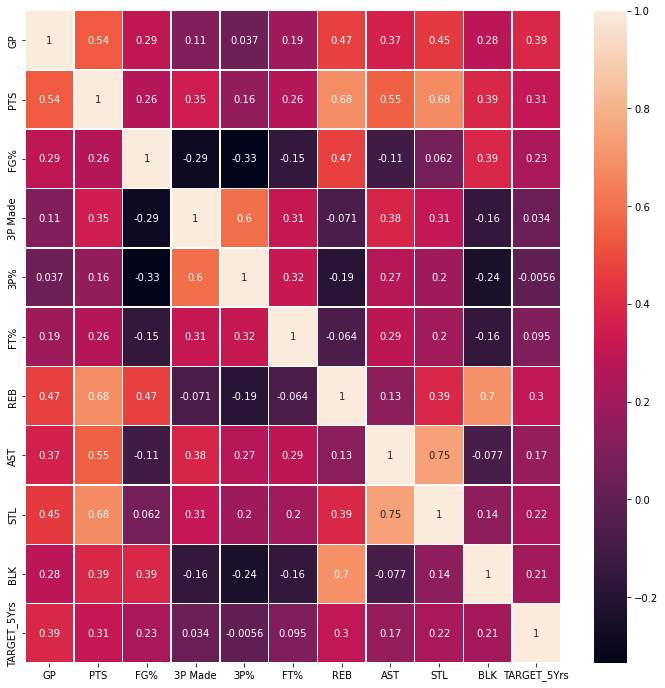

In [ ]:
columns = dataset.columns
toDrop =   ['FGA', 'FGM','MIN','FTM','TOV', 'DREB', 'OREB', 'FTA', '3PA',]
new_col = []
for col in columns:
    if col not in toDrop:
        new_col.append(col)

corr=dataset[new_col].corr()

fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr, annot = True, linewidths = .5, ax = ax)

plt.show()

In [ ]:
#Get the new data with Column X and the Column into Y
columns_to_remove = toDrop + ['TARGET_5Yrs','Name']

X = dataset.drop(columns_to_remove, axis=1)
y = dataset['TARGET_5Yrs']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Data Visualization

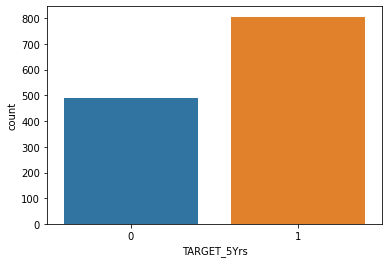

In [ ]:
sns.countplot(y)

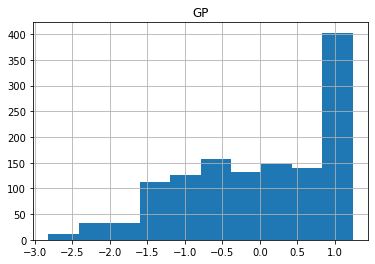

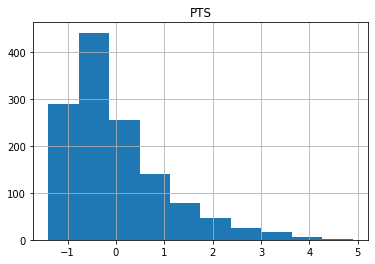

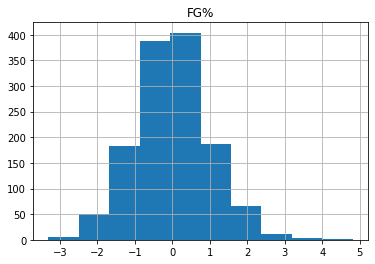

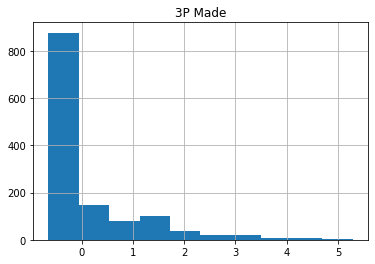

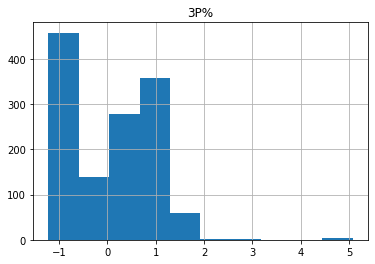

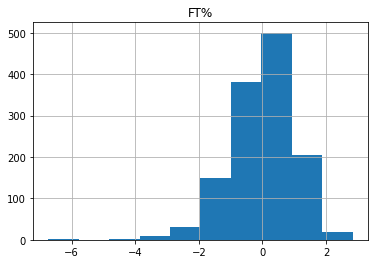

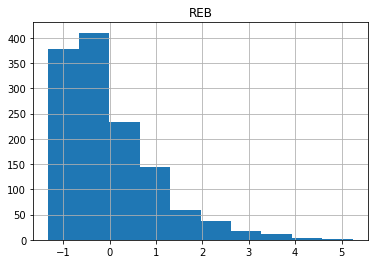

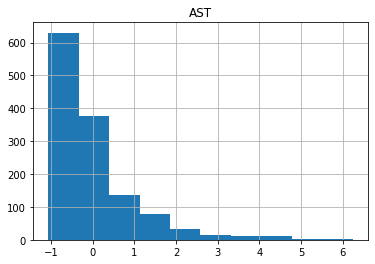

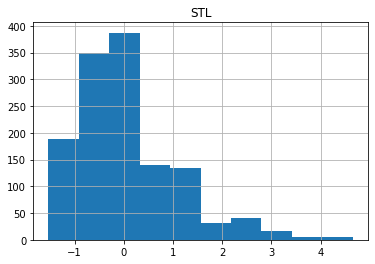

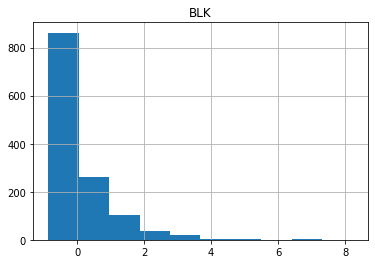

In [ ]:
for col in X.columns:
    X.hist(col)
    plt.show()

# Logistic Regression construction

In [ ]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_likelihood(self, x, y):
        w = self.weights
        scores = np.dot(x, w)
        ll = np.sum(y*scores - np.log(1 + np.exp(scores)))
        return ll

    def MLE_gradient_ascent(self, x, y, epochs, alpha):
        iterations = 0
        weights = self.weights
        for _ in range(epochs):
            iterations += 1
            y_hat = self.sigmoid(np.dot(x, weights))
            dw = np.dot(x.T, (y - y_hat)) /y.shape[0]
            weights += alpha * dw


    def gradient_descent(self, x, y, epochs, alpha,):
        iterations = 0
        weights = self.weights
        for _ in range(epochs):
            iterations += 1
            y_hat = self.sigmoid(np.dot(x, weights))
            dy = (y_hat - y)
            dely = np.dot(dy, x)/y.shape[0]
            weights -= alpha * dely


    def add_intercept(self, x):
        """Add X0 column to the dataset"""
        intercept = np.ones((x.shape[0], 1))
        return np.hstack((intercept, x))


    def fit(self, x, y, epochs=2000, alpha=0.01, add_intercept=True, use_mle = False):
        if isinstance(x, pd.DataFrame):
            x = x.to_numpy()
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.to_numpy()

        x = self.add_intercept(x)

        self.weights = np.zeros(x.shape[1])

        if use_mle:
            self.MLE_gradient_ascent(x, y, epochs, alpha)
        else:
            self.gradient_descent(x, y, epochs, alpha)

    def predict(self, x,prediction_threshold = 0.5):
        x = self.add_intercept(x)
        z = np.dot(x, self.weights)
        return [1 if i > prediction_threshold else 0 for i in self.sigmoid(z)]


## Defining Metrics

In [ ]:
def compute_metrics(cm):
    """An Util function to print the various metrics"""
    n = X.shape[0]
    TN, FP, FN, TP = cm.ravel()
    total = TP+FP+FN+TN

    accuracy = (TP+TN)/total
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2 * precision * recall / (precision + recall)
    error_rate = (FP+FN)/(TP+TN+FP+FN)

    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', f1_score)
    print('Error Rate: ', error_rate)


## Executing Logistic regression with different configuration as per the question

## Case 1:
    Train Data Size = 80%
    Test Data size = 20%

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X, y, test_size=0.2)

#print the shape
print(x_train1.shape)
print(x_test1.shape)

print(y_train1.shape)
print(y_test1.shape)

(1037, 10)
(260, 10)
(1037,)
(260,)


### Using Gradient Descent Approach to reduce the loss

In [ ]:
lr1 = LogisticRegression()
lr1.fit(x_train1, y_train1)
y_pred1 = lr1.predict(x_test1)

In [ ]:
compute_metrics(confusion_matrix(y_test1, y_pred1))

Accuracy:  0.6923076923076923
Precision:  0.7241379310344828
Recall:  0.7974683544303798
F1 Score:  0.7590361445783133
Error Rate:  0.3076923076923077


### Using Maximum Likelihood Estimation

In [ ]:
lr1_mle = LogisticRegression()
lr1_mle.fit(x_train1, y_train1, use_mle= True)
y_pred1_mle = lr1_mle.predict(x_test1)

In [ ]:
compute_metrics(confusion_matrix(y_test1, y_pred1_mle))

Accuracy:  0.6923076923076923
Precision:  0.7241379310344828
Recall:  0.7974683544303798
F1 Score:  0.7590361445783133
Error Rate:  0.3076923076923077


## Case 2 :
    Train Data Size = 10%
    Test Data size = 90%

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y, test_size=0.9)

print(x_train2.shape)
print(x_test2.shape)

print(y_train2.shape)
print(y_test2.shape)

(129, 10)
(1168, 10)
(129,)
(1168,)


### Using Gradient Descent Approach to reduce the loss

In [ ]:
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)
y_pred2 = lr2.predict(x_test2)

In [ ]:
compute_metrics(confusion_matrix(y_test2, y_pred2))

Accuracy:  0.6832191780821918
Precision:  0.7185185185185186
Recall:  0.8038674033149171
F1 Score:  0.7588005215123859
Error Rate:  0.3167808219178082


### Using Maximum Likelihood Estimation

In [ ]:
lr2_mle = LogisticRegression()
lr2_mle.fit(x_train2, y_train2, use_mle= True)
y_pred2_mle = lr2_mle.predict(x_test2)

In [ ]:
compute_metrics(confusion_matrix(y_test2, y_pred2_mle))

Accuracy:  0.6832191780821918
Precision:  0.7185185185185186
Recall:  0.8038674033149171
F1 Score:  0.7588005215123859
Error Rate:  0.3167808219178082


## Case 3 :
    Train Data Size = 50%
    Test Data size = 50%

In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(X,y, test_size=0.5)

#print the shape
print(x_train3.shape)
print(x_test3.shape)

print(y_train3.shape)
print(y_test3.shape)

(648, 10)
(649, 10)
(648,)
(649,)


### Using Gradient Descent Approach to reduce the loss

In [ ]:
lr3 = LogisticRegression()
lr3.fit(x_train3, y_train3)
y_pred3 = lr3.predict(x_test3)

In [ ]:
compute_metrics(confusion_matrix(y_test3, y_pred3))

Accuracy:  0.6964560862865947
Precision:  0.7056277056277056
Recall:  0.8423772609819121
F1 Score:  0.767962308598351
Error Rate:  0.3035439137134052


### Using Maximum Likelihood Estimation

In [ ]:
lr3_mle = LogisticRegression()
lr3_mle.fit(x_train3, y_train3, use_mle= True)
y_pred3_mle = lr3_mle.predict(x_test3)

In [ ]:
compute_metrics(confusion_matrix(y_test3, y_pred3_mle))

Accuracy:  0.6964560862865947
Precision:  0.7056277056277056
Recall:  0.8423772609819121
F1 Score:  0.767962308598351
Error Rate:  0.3035439137134052
